In [1]:
import random
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

random.seed(30)
df = pd.read_csv("data/us_change.csv", index_col=0)
df

,Quarter,Consumption,Income,Production,Savings,Unemployment
1,1970 Q1,0.618566,1.044801,-2.452486,5.299014,0.9
2,1970 Q2,0.451984,1.225647,-0.551459,7.789894,0.5
3,1970 Q3,0.872872,1.585154,-0.358652,7.403984,0.5
4,1970 Q4,-0.271848,-0.239545,-2.185691,1.169898,0.7
5,1971 Q1,1.901345,1.975925,1.909764,3.535667,-0.1
...,...,...,...,...,...,...
194,2018 Q2,0.983112,0.661825,1.117424,-2.723974,0.0
195,2018 Q3,0.853181,0.806271,1.256722,-0.085686,-0.3
196,2018 Q4,0.356512,0.695142,0.948148,5.031337,0.2
197,2019 Q1,0.282885,1.100753,-0.488206,9.760287,-0.1


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Preparação para dividir em treino e teste
def prepare_data_for_regression(df, target_column, covariates, test_size=20):
    """
    Função para dividir os dados entre treino e teste.
    """
    X = df[covariates]
    y = df[target_column]
    X_train, X_test = X[:-test_size], X[-test_size:]
    y_train, y_test = y[:-test_size], y[-test_size:]
    return X_train, X_test, y_train, y_test

def mean_absolute_scaled_error(y_true, y_pred, y_train):
    """
    Função para calcular o MASE (Mean Absolute Scaled Error).
    """
    naive_forecast = np.roll(y_train, 1)[1:]  # Série atrasada para o erro naive
    mae_naive = mean_absolute_error(y_train[1:], naive_forecast)
    mae_model = mean_absolute_error(y_true, y_pred)
    return mae_model / mae_naive


MAE: 0.10001823805097114
RMSE: 0.12354740873366067
MASE: 0.17051072034094356


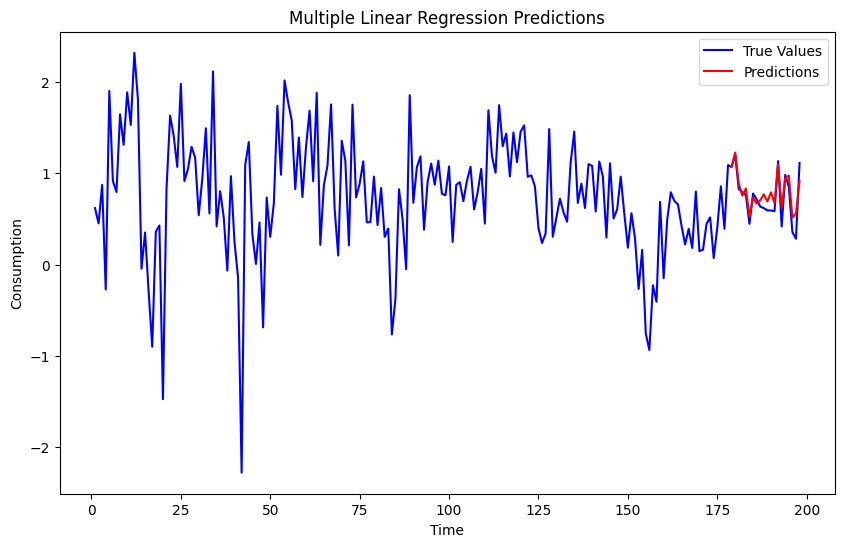

In [ ]:

def fit_and_plot_regression(df, target_column, covariates):
    """
    Função para ajustar um modelo de regressão linear múltipla e plotar as previsões.
    """
    X_train, X_test, y_train, y_test = prepare_data_for_regression(df, target_column, covariates)
    

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mase = mean_absolute_scaled_error(y_test, y_pred, y_train)
    
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"MASE: {mase}")
    

    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[target_column], label="True Values", color="blue")
    plt.plot(df.index[-len(y_test):], y_pred, label="Predictions", color="red")
    plt.xlabel("Time")
    plt.ylabel(target_column)
    plt.title("Multiple Linear Regression Predictions")
    plt.legend()
    plt.show()


covariates = ["Income", "Production", "Savings", "Unemployment"]  # Modifique para as suas covariáveis


fit_and_plot_regression(df, target_column="Consumption", covariates=covariates)
